Device: cpu
data_repo\train.txt exists, skipping download.
data_repo\val.txt exists, skipping download.
data_repo\test.txt exists, skipping download.
Dataset sizes -> train: 213793 val: 7176 test: 7167
Token coords (first 8):
    a idx= 0 -> [-0.25091976  0.9014286 ]
    b idx= 1 -> [0.4639879  0.19731697]
    c idx= 2 -> [-0.6879627  -0.68801093]
    d idx= 3 -> [-0.88383275  0.7323523 ]
    e idx= 4 -> [0.20223002 0.41614518]
    f idx= 5 -> [-0.958831   0.9398197]
    g idx= 6 -> [ 0.6648853 -0.5753218]
    h idx= 7 -> [-0.63635004 -0.633191  ]


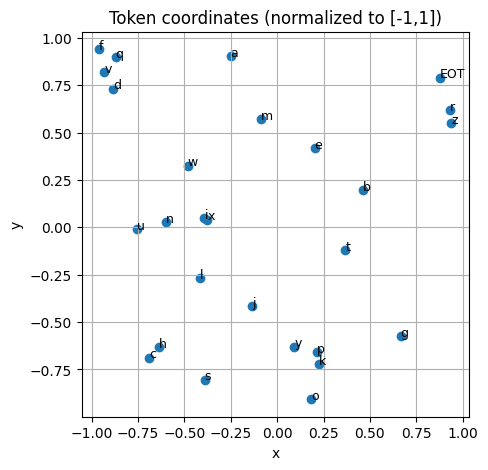


Model instanced. Total params: 8,336, Trainable: 8,336

Token embedding (first 6 rows):
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624],
        [ 1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008,  1.6806,
          1.2791,  1.2964,  0.6105,  1.3347, -0.2316,  0.0418, -0.2516,  0.8599],
        [-1.3847, -0.8712, -0.2234,  1.7174,  0.3189, -0.4245,  0.3057, -0.7746,
         -1.5576,  0.9956, -0.8798, -0.6011, -1.2742,  2.1228, -1.2347, -0.4879],
        [-0.9138, -0.6581,  0.0780,  0.5258, -0.4880,  1.1914, -0.8140, -0.7360,
         -1.4032,  0.0360, -0.0635,  0.6756, -0.0978,  1.8446, -1.1845,  1.3835],
        [ 1.4451,  0.8564,  2.2181,  0.5232,  0.3466, -0.1973, -1.0546,  1.2780,
         -0.1722,  0.5238,  0.0566,  0.4263,  0.5750, -0.6417, -2.2064, -0.7508],
        [ 0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412,  0.0516,
          0.744

C:\Users\kdhome\AppData\Local\Temp\ipykernel_10808\815072528.py:288: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t0 = torch.tensor(batch["t0"], dtype=torch.long, device=DEVICE)
C:\Users\kdhome\AppData\Local\Temp\ipykernel_10808\815072528.py:289: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t1 = torch.tensor(batch["t1"], dtype=torch.long, device=DEVICE)
C:\Users\kdhome\AppData\Local\Temp\ipykernel_10808\815072528.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t2 = torch.tensor(batch["t2"], dtype=torch.long, device=DEVICE)
C:\User

step   1000/50000 | tot_loss 4.8768 | ce_chs 5.9109,3.5703,2.7464 | ang_mse 1.513063 dist_mse 0.206732 | accs 0.047,0.047,0.188 | w=[0.3124529  0.34190607 0.345641  ] | lr=1.000e-04 | elapsed=17.9s
step   2000/50000 | tot_loss 5.2091 | ce_chs 6.1983,3.5604,2.4410 | ang_mse 2.451267 dist_mse 0.211952 | accs 0.031,0.078,0.297 | w=[0.27858156 0.34821454 0.37320393] | lr=9.991e-05 | elapsed=33.1s
step   3000/50000 | tot_loss 4.6428 | ce_chs 5.4322,3.8385,2.4652 | ang_mse 1.662568 dist_mse 0.260890 | accs 0.016,0.047,0.297 | w=[0.2500814  0.34503686 0.40488175] | lr=9.963e-05 | elapsed=48.0s
step   4000/50000 | tot_loss 4.9890 | ce_chs 5.4978,3.7347,2.3680 | ang_mse 2.687830 dist_mse 0.235913 | accs 0.047,0.047,0.312 | w=[0.22562209 0.3314152  0.44296277] | lr=9.917e-05 | elapsed=68.0s
step   5000/50000 | tot_loss 4.7681 | ce_chs 5.6195,3.6223,2.4457 | ang_mse 2.404229 dist_mse 0.213200 | accs 0.016,0.062,0.156 | w=[0.20528902 0.30780262 0.4869084 ] | lr=9.853e-05 | elapsed=88.3s
step   600

In [34]:
# Colab-ready: three-channel small model training on EurekaLabsAI/mlp data
# Paste into a single Colab cell and run.
# NOTE: Default steps = 50000. For quick debug, set MAX_STEPS = 2000.

import os, math, random, requests, time
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader

# -------------------------
# CONFIG (change these for quick debugging)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# vocab: a-z + EOT
VOCAB = [chr(ord('a') + i) for i in range(26)] + ['EOT']
V = len(VOCAB)
EOT_IDX = 26

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

# Data URLs (raw files)
RAW_BASE = "https://raw.githubusercontent.com/EurekaLabsAI/mlp/master/data"
URLS = {
    "train": f"{RAW_BASE}/train.txt",
    "val":   f"{RAW_BASE}/val.txt",
    "test":  f"{RAW_BASE}/test.txt",
}

DATA_DIR = Path("data_repo")
DATA_DIR.mkdir(exist_ok=True)

# coordinates: we sample in [-100,100] then normalize to [-1,1]
EMBED_SPACE = 100.0

# training hyperparams
BATCH_SIZE = 64
MAX_STEPS = 50000  # default as you requested; reduce for quick tests (e.g., 2000)
PRINT_EVERY = 1000
LR = 1e-4
WEIGHT_DECAY = 1e-2
WARMUP_STEPS = 1000

# -------------------------
# download function
def download_if_missing():
    for name, url in URLS.items():
        dest = DATA_DIR / f"{name}.txt"
        if dest.exists():
            print(f"{dest} exists, skipping download.")
            continue
        print(f"Downloading {name} from {url} ...")
        r = requests.get(url, timeout=30)
        if r.status_code != 200:
            raise RuntimeError(f"Failed to download {url}: HTTP {r.status_code}")
        dest.write_text(r.text, encoding="utf-8")
        print(f"Saved {dest} ({len(r.text)} bytes)")

# -------------------------
# tokenization
def text_to_token_ids(text):
    ids = []
    for ch in text.lower():
        if 'a' <= ch <= 'z':
            idx = ord(ch) - ord('a')
            ids.append(idx)
        else:
            ids.append(EOT_IDX)
    return ids

# -------------------------
# Dataset -> sliding windows (t0,t1,t2)->t3
class SlidingTextDataset(Dataset):
    def __init__(self, file_path):
        txt = Path(file_path).read_text(encoding='utf-8')
        ids = text_to_token_ids(txt)
        self.windows = []
        for i in range(len(ids) - 3):
            self.windows.append((np.int64(ids[i]), np.int64(ids[i+1]), np.int64(ids[i+2]), np.int64(ids[i+3])))
    def __len__(self):
        return len(self.windows)
    def __getitem__(self, idx):
        t0,t1,t2,t3 = self.windows[idx]
        return {"t0": t0, "t1": t1, "t2": t2, "t3": t3}

# -------------------------
# fixed coordinates generator (seeded)
def make_fixed_coords(seed=SEED, vocab_size=V, embed_space=EMBED_SPACE):
    rng = np.random.RandomState(seed)
    raw = rng.uniform(low=-embed_space, high=embed_space, size=(vocab_size, 2)).astype(np.float32)
    coords = raw / embed_space   # normalized to [-1,1] floats
    return torch.from_numpy(coords)  # (V,2)

# -------------------------
# small 3-channel model (well under 100k params)
class ThreeChannelPredictor(nn.Module):
    def __init__(self, vocab_size, coords_fixed_tensor, emb_dim=16, hidden=64):
        super().__init__()
        self.vocab_size = vocab_size
        self.coords_fixed = coords_fixed_tensor.to(DEVICE)  # not learnable (fixed)
        # Channel3 token embedding (small)
        self.tok_embed = nn.Embedding(vocab_size, emb_dim)
        # Channel1 (angle): input 6 floats -> small MLP -> scalar
        self.ch1_mlp = nn.Sequential(
            nn.Linear(6, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden//4),
            nn.ReLU(),
            nn.Linear(hidden//4, 1)
        )
        # Channel2 (distance): same shape
        self.ch2_mlp = nn.Sequential(
            nn.Linear(6, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden//4),
            nn.ReLU(),
            nn.Linear(hidden//4, 1)
        )
        # Channel3: sequence token classifier from concatenated token embeddings
        self.ch3_mlp = nn.Sequential(
            nn.Linear(emb_dim * 3, hidden),
            nn.ReLU(),
            nn.Linear(hidden, vocab_size)
        )
        # trainable raw weights for combining CE channel losses (softmaxed)
        self.raw_channel_weights = nn.Parameter(torch.tensor([1.0, 1.0, 1.0], dtype=torch.float32))

    def forward(self, t0_ids, t1_ids, t2_ids):
        # gather coords for geometry channels
        batch = t0_ids.shape[0]
        c0 = self.coords_fixed[t0_ids].to(DEVICE)  # (batch,2)
        c1 = self.coords_fixed[t1_ids].to(DEVICE)
        c2 = self.coords_fixed[t2_ids].to(DEVICE)
        inp = torch.cat([c0, c1, c2], dim=-1)  # (batch,6)

        # CH1 angle regression (tanh -> [-pi, pi])
        ang_raw = self.ch1_mlp(inp).squeeze(-1)
        ang_pred = torch.tanh(ang_raw) * math.pi  # (batch,)

        # CH2 distance regression (tanh -> [0, max_possible_dist])
        dist_raw = self.ch2_mlp(inp).squeeze(-1)
        max_possible_dist = math.sqrt(8.0)  # points in [-1,1]^2
        dist_pred = (torch.tanh(dist_raw) + 1.0) * 0.5 * max_possible_dist  # (batch,)

        # CH1 logits: compare predicted direction to directions from c2 to all token coords
        dir_pred = torch.stack([torch.cos(ang_pred), torch.sin(ang_pred)], dim=-1)  # (batch,2)
        coords_exp = self.coords_fixed.unsqueeze(0).expand(batch, -1, -1)  # (batch,V,2)
        c2_exp = c2.unsqueeze(1).expand(-1, self.vocab_size, -1)         # (batch,V,2)
        dir_to_tokens = coords_exp - c2_exp
        norm = torch.norm(dir_to_tokens, dim=-1, keepdim=True).clamp(min=1e-6)
        dir_to_tokens_unit = dir_to_tokens / norm
        ch1_logits = torch.sum(dir_pred.unsqueeze(1) * dir_to_tokens_unit, dim=-1)  # cos similarity (batch,V)
        ch1_logits = ch1_logits * 8.0  # temperature sharpening

        # CH2 logits: closeness of predicted distance to actual distances
        dists_to_tokens = torch.norm(coords_exp - c2_exp, dim=-1)  # (batch,V)
        ch2_logits = - (dists_to_tokens - dist_pred.unsqueeze(1)) ** 2
        ch2_logits = ch2_logits * 5.0

        # CH3 logits: classic token classifier
        t0_emb = self.tok_embed(t0_ids)
        t1_emb = self.tok_embed(t1_ids)
        t2_emb = self.tok_embed(t2_ids)
        ch3_in = torch.cat([t0_emb, t1_emb, t2_emb], dim=-1)  # (batch, emb_dim*3)
        ch3_logits = self.ch3_mlp(ch3_in)  # (batch, V)

        w = F.softmax(self.raw_channel_weights, dim=0)  # normalized trainable weights (3,)
        return {
            "ang_pred": ang_pred,
            "dist_pred": dist_pred,
            "ch1_logits": ch1_logits,
            "ch2_logits": ch2_logits,
            "ch3_logits": ch3_logits,
            "channel_weights": w
        }

# -------------------------
# helper functions
def angle_between(a, b):
    vec = b - a
    return torch.atan2(vec[...,1], vec[...,0])

def distance_between(a, b):
    return torch.norm(b - a, dim=-1)

def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

# -------------------------
# Prepare data
print("Downloading data if needed...")
download_if_missing()
train_ds = SlidingTextDataset(DATA_DIR / "train.txt")
val_ds   = SlidingTextDataset(DATA_DIR / "val.txt")
test_ds  = SlidingTextDataset(DATA_DIR / "test.txt")
print("Dataset sizes -> train:", len(train_ds), "val:", len(val_ds), "test:", len(test_ds))

# use deterministic generator for DataLoader shuffle
g = torch.Generator()
g.manual_seed(SEED)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=0, generator=g)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False, num_workers=0)

# -------------------------
# Make coords and model
coords = make_fixed_coords(seed=SEED)  # (V,2), floats in [-1,1]
print("Token coords (first 8):")
for i in range(min(8, V)):
    print(f"  {VOCAB[i]:>3s} idx={i:2d} -> {coords[i].numpy()}")

# plot coords (optional): requires matplotlib
try:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5))
    xy = coords.numpy()
    ax.scatter(xy[:,0], xy[:,1], c='tab:blue')
    for i, lab in enumerate(VOCAB):
        ax.text(xy[i,0], xy[i,1], lab, fontsize=9)
    ax.set_title("Token coordinates (normalized to [-1,1])")
    ax.set_xlabel("x"); ax.set_ylabel("y")
    ax.grid(True)
    plt.show()
except Exception as e:
    print("Plot skipped (matplotlib not available?) -", e)

# instantiate model with small dims (emb_dim=16, hidden=64)
model = ThreeChannelPredictor(V, coords, emb_dim=16, hidden=64).to(DEVICE)
total_params, trainable_params = count_parameters(model)
print(f"\nModel instanced. Total params: {total_params:,}, Trainable: {trainable_params:,}")
assert trainable_params <= 100_000, f"Trainable params must be <=100k, but got {trainable_params}"

# DEBUG prints: show token embedding (first rows), raw_channel_weights initial
print("\nToken embedding (first 6 rows):")
print(model.tok_embed.weight.data[:6])

print("\nraw_channel_weights (before softmax):", model.raw_channel_weights.data)
print("channel weights (softmax):", F.softmax(model.raw_channel_weights, dim=0).detach().cpu().numpy())

# Print model summary (architecture)
print("\nModel architecture:")
print(model)

# Print per-parameter table (fixed formatting)
print("\nParameters (name, shape, #params, trainable):")
for name, p in model.named_parameters():
    shape_str = str(tuple(p.shape))
    print(f" - {name:40s} | shape {shape_str:20s} | # {p.numel():6d} | trainable={p.requires_grad}")

# -------------------------
# Losses, optimizer, scheduler
mse_loss = nn.MSELoss()
ce_loss = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def lr_lambda(step):
    if step < WARMUP_STEPS:
        return float(step) / max(1.0, WARMUP_STEPS)
    progress = float(step - WARMUP_STEPS) / max(1, MAX_STEPS - WARMUP_STEPS)
    return 0.1 + 0.9 * 0.5 * (1.0 + math.cos(math.pi * progress))

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

# -------------------------
# Training loop
print_every = PRINT_EVERY
step = 0
it = iter(train_loader)
model.train()
t0_time = time.time()
print("\nStarting training loop (steps = {})".format(MAX_STEPS))
while step < MAX_STEPS:
    try:
        batch = next(it)
    except StopIteration:
        it = iter(train_loader)
        batch = next(it)

    t0 = torch.tensor(batch["t0"], dtype=torch.long, device=DEVICE)
    t1 = torch.tensor(batch["t1"], dtype=torch.long, device=DEVICE)
    t2 = torch.tensor(batch["t2"], dtype=torch.long, device=DEVICE)
    t3 = torch.tensor(batch["t3"], dtype=torch.long, device=DEVICE)

    out = model(t0, t1, t2)

    # compute regression targets from fixed coords
    c2 = coords[t2].to(DEVICE)
    c3 = coords[t3].to(DEVICE)
    ang_target = angle_between(c2, c3)
    dist_target = distance_between(c2, c3)

    loss_ang = mse_loss(out["ang_pred"], ang_target)
    loss_dist = mse_loss(out["dist_pred"], dist_target)

    loss_ce_ch1 = ce_loss(out["ch1_logits"], t3)
    loss_ce_ch2 = ce_loss(out["ch2_logits"], t3)
    loss_ce_ch3 = ce_loss(out["ch3_logits"], t3)

    w = out["channel_weights"]
    loss_ce = w[0]*loss_ce_ch1 + w[1]*loss_ce_ch2 + w[2]*loss_ce_ch3

    total_loss = loss_ce + 0.5 * loss_ang + 0.5 * loss_dist

    optimizer.zero_grad()
    total_loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 2.0)
    optimizer.step()
    scheduler.step()

    if (step % print_every) == 0:
        # compute small diagnostics (accuracy per channel on this batch)
        with torch.no_grad():
            acc1 = (out["ch1_logits"].argmax(dim=-1) == t3).float().mean().item()
            acc2 = (out["ch2_logits"].argmax(dim=-1) == t3).float().mean().item()
            acc3 = (out["ch3_logits"].argmax(dim=-1) == t3).float().mean().item()
            lr_now = optimizer.param_groups[0]["lr"]
            elapsed = time.time() - t0_time
        print(f"step {step:6d}/{MAX_STEPS} | tot_loss {total_loss.item():.4f} | ce_chs {loss_ce_ch1.item():.4f},{loss_ce_ch2.item():.4f},{loss_ce_ch3.item():.4f} | "
              f"ang_mse {loss_ang.item():.6f} dist_mse {loss_dist.item():.6f} | accs {acc1:.3f},{acc2:.3f},{acc3:.3f} | w={w.cpu().detach().numpy()} | lr={lr_now:.3e} | elapsed={elapsed:.1f}s")
    step += 1

print("Training finished. Total time:", time.time() - t0_time)

# -------------------------
# Small evaluation helper and example
def predict_next(model, t0_id, t1_id, t2_id, topk=5):
    model.eval()
    with torch.no_grad():
        t0t = torch.tensor([t0_id], dtype=torch.long, device=DEVICE)
        t1t = torch.tensor([t1_id], dtype=torch.long, device=DEVICE)
        t2t = torch.tensor([t2_id], dtype=torch.long, device=DEVICE)
        out = model(t0t, t1t, t2t)
        p1 = F.softmax(out["ch1_logits"], dim=-1).cpu().numpy()[0]
        p2 = F.softmax(out["ch2_logits"], dim=-1).cpu().numpy()[0]
        p3 = F.softmax(out["ch3_logits"], dim=-1).cpu().numpy()[0]
        def topk_str(p):
            idx = np.argsort(-p)[:topk]
            return [(VOCAB[i], float(p[i])) for i in idx]
        return {
            "angle_pred_rad": float(out["ang_pred"].cpu().numpy()[0]),
            "dist_pred": float(out["dist_pred"].cpu().numpy()[0]),
            "ch1_top": topk_str(p1),
            "ch2_top": topk_str(p2),
            "ch3_top": topk_str(p3),
            "channel_weights": out["channel_weights"].cpu().numpy()
        }

# demo prediction on first window
if len(train_ds) > 0:
    demo_window = train_ds.windows[0]
    print("\nDemo window (t0,t1,t2) tokens:", [VOCAB[i] for i in demo_window[:3]])
    demo = predict_next(model, demo_window[0], demo_window[1], demo_window[2], topk=6)
    print("Demo prediction (channel topk & regression outputs):")
    print(demo)

# save model checkpoint (optional)
torch.save({
    "model_state_dict": model.state_dict(),
    "coords": coords,
    "vocab": VOCAB
}, "three_channel_small_checkpoint.pt")
print("Saved checkpoint: three_channel_small_checkpoint.pt")


In [35]:
# sample

In [36]:
import torch
import torch.nn.functional as F
import numpy as np

# ---------- utility: top-k / top-p filtering for a probability vector ----------
def apply_top_k_top_p(probs, top_k=None, top_p=None):
    """
    probs: 1D torch tensor (V,) of non-negative probabilities (sums to 1)
    returns: filtered probs (same shape), re-normalized to sum=1
    """
    V = probs.size(0)
    p = probs.clone()

    # TOP-K
    if top_k is not None and top_k > 0 and top_k < V:
        # keep only top_k probs
        vals, idx = torch.topk(p, top_k)
        mask = torch.full_like(p, 0.0)
        mask[idx] = 1.0
        p = p * mask

    # TOP-P (nucleus)
    if top_p is not None and 0.0 < top_p < 1.0:
        sorted_p, sorted_idx = torch.sort(p, descending=True)
        cumsum = torch.cumsum(sorted_p, dim=0)
        # keep tokens where cumulative prob <= top_p (inclusive of first that exceeds)
        cutoff = (cumsum <= top_p)
        # ensure at least one token retained
        if not cutoff.any():
            cutoff[0] = True
        keep_count = cutoff.sum().item()
        # create mask
        topk_idx = sorted_idx[:keep_count]
        mask = torch.zeros_like(p)
        mask[topk_idx] = 1.0
        p = p * mask

    # if everything zeroed (rare), fallback to original probs
    if p.sum() <= 0.0:
        p = probs.clone()

    # renormalize
    p = p / p.sum()
    return p

# ---------- function: sample a single next token distribution and sample ----------
def sample_next_token(model, t0_id, t1_id, t2_id, temperature=1.0, top_k=None, top_p=None, deterministic=False):
    """
    model: trained ThreeChannelPredictor (in eval mode)
    t*_id: scalar ints (token indices) or 0-d torch tensors on CPU
    Returns: sampled_token_idx (int), diagnostics dict
    """
    model.eval()
    with torch.no_grad():
        # prepare tensors on same device as model
        dev = next(model.parameters()).device
        t0 = torch.tensor([t0_id], dtype=torch.long, device=dev)
        t1 = torch.tensor([t1_id], dtype=torch.long, device=dev)
        t2 = torch.tensor([t2_id], dtype=torch.long, device=dev)

        out = model(t0, t1, t2)
        w = out["channel_weights"].to(dev)        # shape (3,)

        # get per-channel logits and convert to probabilities (scale by temperature)
        # Note: temperature applied to logits is equivalent to dividing logits by temperature.
        eps = 1e-12
        temp = max(1e-8, float(temperature))

        p1 = F.softmax(out["ch1_logits"].squeeze(0) / temp, dim=-1)  # angle-channel probs
        p2 = F.softmax(out["ch2_logits"].squeeze(0) / temp, dim=-1)  # distance-channel probs
        p3 = F.softmax(out["ch3_logits"].squeeze(0) / temp, dim=-1)  # token-id-channel probs

        # Weighted mixture of probabilities (using learned channel weights)
        combined = w[0]*p1 + w[1]*p2 + w[2]*p3
        combined = combined / (combined.sum() + eps)

        # apply top-k / top-p on combined distribution
        filtered = apply_top_k_top_p(combined, top_k=top_k, top_p=top_p)

        # sampling
        if deterministic or temperature == 0.0:
            next_idx = int(filtered.argmax().item())
        else:
            # torch.multinomial expects float nonnegative sum-to-1 tensor
            next_idx = int(torch.multinomial(filtered, num_samples=1).item())

        # return also per-channel topk for debugging
        def topk_list(p, k=5):
            vals, idx = torch.topk(p, min(k, p.size(0)))
            return [(int(i.item()), float(v.item())) for v,i in zip(vals, idx)]

        diagnostics = {
            "combined_probs": combined.cpu().numpy(),
            "filtered_probs": filtered.cpu().numpy(),
            "ch1_top5": topk_list(p1.cpu(), 5),
            "ch2_top5": topk_list(p2.cpu(), 5),
            "ch3_top5": topk_list(p3.cpu(), 5),
            "channel_weights": w.cpu().numpy(),
            "ang_pred": float(out["ang_pred"].cpu().numpy()[0]),
            "dist_pred": float(out["dist_pred"].cpu().numpy()[0])
        }
        return next_idx, diagnostics

# ---------- function: autoregressive sampling of a sequence ----------
def sample_sequence(model, start_tokens, length=50, temperature=1.0, top_k=None, top_p=None, stop_on_eot=True, deterministic=False, seed=None):
    """
    start_tokens: list of token indices (ints) or string (e.g., 'abc') -> if string, converted to indices a..z and others -> EOT
    length: total number of tokens to generate (not counting the provided start tokens)
    Returns: generated_indices list (including start), diagnostics_per_step list
    """
    # helper to map char->idx if start_tokens is string
    def char_to_idx(ch):
        ch = ch.lower()
        if 'a' <= ch <= 'z':
            return ord(ch) - ord('a')
        else:
            return 26  # EOT

    # prepare initial context (need at least 3 tokens). If shorter, pad with EOT on the left.
    if isinstance(start_tokens, str):
        ctx = [char_to_idx(c) for c in start_tokens]
    else:
        ctx = list(start_tokens)

    # left-pad with EOTs if ctx shorter than 3
    while len(ctx) < 3:
        ctx.insert(0, 26)

    # optionally set seed for reproducibility
    if seed is not None:
        torch.manual_seed(seed)
        np.random.seed(seed)

    generated = list(ctx)   # full token sequence including initial
    diagnostics = []

    model.eval()
    for step in range(length):
        t0, t1, t2 = generated[-3], generated[-2], generated[-1]
        nxt, diag = sample_next_token(model, t0, t1, t2, temperature=temperature, top_k=top_k, top_p=top_p, deterministic=deterministic)
        generated.append(nxt)
        diagnostics.append(diag)
        # stop early on EOT if requested
        if stop_on_eot and nxt == 26:
            break

    return generated, diagnostics

# ---------- Example usage (after training) ----------
# Suppose `model` and `VOCAB` are available in the notebook
# Example: start from the first window in your training set:
demo_window = train_ds.windows[0]   # (t0,t1,t2,t3)
start_ctx = demo_window[:3]
seq, diags = sample_sequence(model, start_ctx, length=30, temperature=1.0, top_k=5, seed=42)
#Convert to tokens:
token_seq = [VOCAB[i] for i in seq]
print("Generated:", ''.join(token_seq))


Generated: rayleyEOT


In [37]:
# ---------- Sample 100 tokens and print, mapping EOT (idx 26) -> '\n' ----------
# Requires: sample_sequence(model, ...) and VOCAB and train_ds present in the notebook.

# map displayed token -> show '\n' for EOT index 26
def display_token(idx):
    if int(idx) == 26:
        return '\n'
    else:
        return VOCAB[int(idx)]

print(" 0 = a ... 26 = \\n")
print(display_token(0))
print(display_token(26))
print(40*"-")

# lyn 11 24 13 
for ijk in range(26):
    print(ijk, display_token(ijk))
############
prompt_to_conv = "lyn"
prompt_add = []
for hgj in prompt_to_conv:
    for mmj in range(26):
        if display_token(mmj) == hgj:
            print('test >> ', hgj)
            prompt_add.append(mmj)
            break

print("prompt_add >> ", prompt_add)
############

# prepare a start context: try to use first training window if available, else fallback to 'the'
if 'train_ds' in globals() and len(train_ds) > 0:
    start_ctx = list(train_ds.windows[0][:3])  # (t0,t1,t2)
    print(start_ctx)
    #start_ctx = list([11, 24, 13]) # lyn
    start_ctx = prompt_add
    print("Starting context (from train_ds first window):", [VOCAB[i] if i<26 else '\\n' for i in start_ctx])
else:
    # fallback prompt "the" -> indices for 't','h','e'
    start_ctx = [ord('t')-ord('a'), ord('h')-ord('a'), ord('e')-ord('a')]
    print("train_ds not found, using fallback start context:", [VOCAB[i] for i in start_ctx])

# Generate 100 tokens (not stopping on EOT), top_k sampling for safer results
generated_indices, diagnostics = sample_sequence(
    model,
    start_tokens=start_ctx,
    length=100,            # produce 100 new tokens
    temperature=1.0,
    top_k=5,
    top_p=None,
    stop_on_eot=False,     # DO NOT stop on EOT
    deterministic=False,
    seed=42
)

# Convert indices to displayable characters, mapping idx 26 -> newline
display_chars = [display_token(i) for i in generated_indices]

# Print as a continuous string (newlines will be rendered)
print("\n--- Generated (100 tokens + context) ---\n")
print(''.join(display_chars))

# Also show the raw indices and the per-step channel weights for the last step (as extra debug)
print("\nGenerated indices (first 50 shown):", generated_indices[:50])
if diagnostics:
    last_diag = diagnostics[-1]
    print("Last-step channel weights:", last_diag.get("channel_weights"))
    print("Last-step top3 per-channel (ch1/ch2/ch3):")
    print(" CH1 top3 indices+probs:", last_diag["ch1_top5"][:3])
    print(" CH2 top3 indices+probs:", last_diag["ch2_top5"][:3])
    print(" CH3 top3 indices+probs:", last_diag["ch3_top5"][:3])


 0 = a ... 26 = \n
a


----------------------------------------
0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z
test >>  l
test >>  y
test >>  n
prompt_add >>  [11, 24, 13]
[17, 0, 24]
Starting context (from train_ds first window): ['l', 'y', 'n']

--- Generated (100 tokens + context) ---

lynn
ameri
marion
myranilen
amera
marie
jiela
kerena
kyn
mai
jamar
mera
dan
mareen
jere
korrin
kairie
r

Generated indices (first 50 shown): [11, 24, 13, 13, 26, 0, 12, 4, 17, 8, 26, 12, 0, 17, 8, 14, 13, 26, 12, 24, 17, 0, 13, 8, 11, 4, 13, 26, 0, 12, 4, 17, 0, 26, 12, 0, 17, 8, 4, 26, 9, 8, 4, 11, 0, 26, 10, 4, 17, 4]
Last-step channel weights: [0.00661682 0.00928575 0.9840974 ]
Last-step top3 per-channel (ch1/ch2/ch3):
 CH1 top3 indices+probs: [(25, 0.28109219670295715), (17, 0.27800145745277405), (6, 0.15120220184326172)]
 CH2 top3 indices+probs: [(6, 0.08045969158411026), (22, 0.07726635783910751), (23, 0.07524733245372772)]

In [38]:
# Corrected Detailed sampling loop: 100 tokens with losses & diagnostics per-step
import torch
import torch.nn.functional as F
import numpy as np
import math
from math import pi

# sanity checks
assert 'model' in globals(), "model not found. Run training cell first."
assert 'coords' in globals(), "coords tensor not found."
assert 'VOCAB' in globals(), "VOCAB not found."
device = next(model.parameters()).device

EPS = 1e-12

def neg_log_prob_of_index(probs_tensor, idx):
    p = float(probs_tensor[int(idx)].item())
    return -np.log(max(p, EPS))

def entropy_of_probs(probs_tensor):
    p = probs_tensor.cpu().numpy()
    p = np.clip(p, EPS, 1.0)
    return float(-(p * np.log(p)).sum())

# Prepare a start context (reuse previous logic)
if 'train_ds' in globals() and len(train_ds) > 0:
    start_ctx = list(train_ds.windows[0][:3])
else:
    start_ctx = [ord('t')-ord('a'), ord('h')-ord('a'), ord('e')-ord('a')]

# change na lyn as start prompt
start_ctx = list([11, 24, 13])

print("Start context (tokens):", [VOCAB[i] if i < 26 else '\\n' for i in start_ctx])

# We'll generate 100 tokens
N_GEN = 100
temperature = 1.0
top_k = 5
top_p = None
seed = 42

# initialize RNG for reproducibility
torch.manual_seed(seed)
np.random.seed(seed)

generated = list(start_ctx)  # contains context + generated tokens
running = {
    "total_ce": 0.0,
    "ch1_ce": 0.0,
    "ch2_ce": 0.0,
    "ch3_ce": 0.0,
    "ang_mse": 0.0,
    "dist_mse": 0.0,
    "entropy": 0.0
}

print("\nDetailed per-step diagnostics (first 100 steps):")
print("-" * 120)
header = ("step", "chosen", "idx", "ch_weights", "comb_prob", "ch1_ce", "ch2_ce", "ch3_ce",
          "comb_ce", "ang_pred(rad)", "ang_tgt(rad)", "ang_sqerr", "dist_pred", "dist_tgt", "dist_sqerr", "entropy")
print("{:>4s} {:>6s} {:>4s} {:>18s} {:>9s} {:>8s} {:>8s} {:>8s} {:>9s} {:>12s} {:>12s} {:>10s} {:>10s} {:>10s} {:>9s}".format(*header))
print("-" * 120)

for step in range(N_GEN):
    t0, t1, t2 = generated[-3], generated[-2], generated[-1]
    # get model outputs & probabilities using sample_next_token helper
    next_idx, diag = sample_next_token(model, t0, t1, t2,
                                       temperature=temperature, top_k=top_k, top_p=top_p,
                                       deterministic=False)
    # store token
    generated.append(next_idx)

    # retrieve per-channel probability vectors (torch tensors)
    dev = device
    with torch.no_grad():
        t0t = torch.tensor([t0], dtype=torch.long, device=dev)
        t1t = torch.tensor([t1], dtype=torch.long, device=dev)
        t2t = torch.tensor([t2], dtype=torch.long, device=dev)
        out = model(t0t, t1t, t2t)
        p1 = F.softmax(out["ch1_logits"].squeeze(0) / max(1e-8, temperature), dim=-1)  # tensor (V,)
        p2 = F.softmax(out["ch2_logits"].squeeze(0) / max(1e-8, temperature), dim=-1)
        p3 = F.softmax(out["ch3_logits"].squeeze(0) / max(1e-8, temperature), dim=-1)
        w = out["channel_weights"]  # tensor (3,)
        combined = (w[0]*p1 + w[1]*p2 + w[2]*p3).cpu()

        ang_pred = float(out["ang_pred"].cpu().numpy()[0])
        dist_pred = float(out["dist_pred"].cpu().numpy()[0])

    # compute negative-log-likelihood (CE) for the chosen token per channel
    ch1_ce = neg_log_prob_of_index(p1.cpu(), next_idx)
    ch2_ce = neg_log_prob_of_index(p2.cpu(), next_idx)
    ch3_ce = neg_log_prob_of_index(p3.cpu(), next_idx)
    comb_ce = neg_log_prob_of_index(combined, next_idx)
    comb_prob_of_chosen = float(combined[int(next_idx)].item())

    # regression targets: angle & distance from c2 to coords[next_idx]
    # --- FIX: compute dy, dx as floats then use math.atan2 (avoids mixing tensor & float in torch.atan2)
    c2 = coords[t2]            # tensor on CPU (coords is CPU); no .item() yet
    c_next = coords[int(next_idx)]
    dy = float((c_next - c2)[1].item())
    dx = float((c_next - c2)[0].item())
    ang_tgt = math.atan2(dy, dx)     # returns float
    dist_tgt = float(torch.norm(c_next - c2).item())

    ang_sqerr = (ang_pred - ang_tgt) ** 2
    dist_sqerr = (dist_pred - dist_tgt) ** 2

    # entropy of combined distribution
    ent = entropy_of_probs(combined)

    # accumulate running sums
    running["total_ce"] += comb_ce
    running["ch1_ce"] += ch1_ce
    running["ch2_ce"] += ch2_ce
    running["ch3_ce"] += ch3_ce
    running["ang_mse"] += ang_sqerr
    running["dist_mse"] += dist_sqerr
    running["entropy"] += ent

    # pretty prints
    chosen_display = '\\n' if int(next_idx) == 26 else VOCAB[int(next_idx)]
    w_np = [round(float(x), 3) for x in w.cpu().numpy()]

    print(f"{step:4d} {repr(chosen_display):>6s} {next_idx:4d} {str(w_np):>18s} {comb_prob_of_chosen:9.4f} "
          f"{ch1_ce:8.3f} {ch2_ce:8.3f} {ch3_ce:8.3f} {comb_ce:9.3f} "
          f"{ang_pred:12.3f} {ang_tgt:12.3f} {ang_sqerr:10.5f} {dist_pred:10.4f} {dist_tgt:10.4f} {dist_sqerr:9.5f}")

# After loop show averages
n = N_GEN
print("-" * 120)
print("Averages over {} generated steps:".format(n))
print(" avg combined CE (nll): {:.4f}".format(running["total_ce"]/n))
print(" avg ch1 CE: {:.4f}, ch2 CE: {:.4f}, ch3 CE: {:.4f}".format(
    running["ch1_ce"]/n, running["ch2_ce"]/n, running["ch3_ce"]/n))
print(" avg ang MSE: {:.6f}, avg dist MSE: {:.6f}, avg entropy: {:.4f}".format(
    running["ang_mse"]/n, running["dist_mse"]/n, running["entropy"]/n))

# Optionally print the generated token string (mapping EOT -> newline)
display_string = ''.join((('\\n' if int(i)==26 else VOCAB[int(i)]) for i in generated))
print("\n--- Generated sequence (context + generated) ---\n")
print(display_string)


Start context (tokens): ['l', 'y', 'n']

Detailed per-step diagnostics (first 100 steps):
------------------------------------------------------------------------------------------------------------------------
step chosen  idx         ch_weights comb_prob   ch1_ce   ch2_ce   ch3_ce   comb_ce ang_pred(rad) ang_tgt(rad)  ang_sqerr  dist_pred   dist_tgt dist_sqerr
------------------------------------------------------------------------------------------------------------------------
   0    'n'   13 [0.007, 0.009, 0.984]    0.3189   10.015    8.415    1.127     1.143        0.255        0.000    0.06521     1.0686     0.0000   1.14196
   1  '\\n'   26 [0.007, 0.009, 0.984]    0.6143    2.167    3.863    0.473     0.487        0.278        0.475    0.03879     1.1612     1.6640   0.25276
   2    'a'    0 [0.007, 0.009, 0.984]    0.1028   11.701    2.676    2.265     2.275       -1.370        3.043   19.47684     1.3269     1.1354   0.03666
   3    'm'   12 [0.007, 0.009, 0.984]    0.1056 